In [3]:
import pandas as pd

data_path = "data/7 B for Ford.xlsx"
df_dict = pd.read_excel(data_path, sheet_name=None)

In [36]:
train_df = df_dict["Train new"]
test_df = df_dict["Test2022"]
print("train_df", train_df.shape)
print("test_df", test_df.shape)

train_df (26835, 194)
test_df (69, 192)


(array([ 2.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  5., 10.,  5.,  8.,
        11., 11., 13., 17., 20., 26., 23., 30., 25., 23., 27., 31., 29.,
        40., 41., 27., 49., 35., 37., 23., 31., 21., 23., 28., 23., 17.,
        16., 23., 16., 13., 15.,  8., 13.,  9., 13., 11.,  9.,  8., 11.,
         8.,  8.,  9.,  5., 10.,  4.,  3.,  3.,  6.,  2.,  4.,  5.,  3.,
         3.,  3.,  4.,  1.,  3.,  3.,  3.,  2.,  2.,  1.,  1.,  0.,  3.,
         0.,  2.,  3.,  3.,  3.,  1.,  3.,  1.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.]),
 array([0.02091115, 0.02678851, 0.03266587, 0.03854323, 0.04442059,
        0.05029795, 0.0561753 , 0.06205266, 0.06793002, 0.07380738,
        0.07968474, 0.0855621 , 0.09143945, 0.09731681, 0.10319417,
        0.10907153, 0.11494889, 0.12082625, 0.1267036 , 0.13258096,
        0.13845832, 0.14433568, 0.15021304, 0.1560904 , 0.16196775,
        0.16784511, 0.17372247, 0.17959983, 0.18547719, 0.19135455,
        0.1972319 , 0.2031

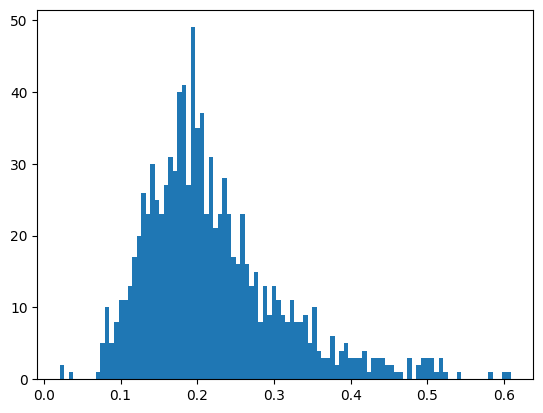

In [37]:
y_nor = train_df["y_nor"]
# plot histogram
import matplotlib.pyplot as plt

plt.hist(y_nor, bins=100)

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 2., 0.,
        0., 3., 1., 0., 1., 0., 2., 3., 2., 4., 2., 1., 1., 0., 0., 1., 0.,
        3., 3., 3., 1., 0., 3., 1., 2., 3., 2., 3., 0., 3., 0., 0., 0., 1.,
        2., 2., 2., 0., 1., 3., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([-0.00203283,  0.00507167,  0.01217617,  0.01928068,  0.02638518,
         0.03348968,  0.04059419,  0.04769869,  0.05480319,  0.06190769,
         0.0690122 ,  0.0761167 ,  0.0832212 ,  0.0903257 ,  0.09743021,
         0.10453471,  0.11163921,  0.11874372,  0.12584822,  0.13295272,
         0.14005722,  0.14716173,  0.15426623,  0.16137073,  0.16847523,
         0.17557974,  0.18268424,  0.18978874,  0.19689325,  0.20399775,
         0.21110225,  0.21820675,  0.22531126,  0.23241576,  0.23952026,
         0.24662477,  0.25372927,  0.26

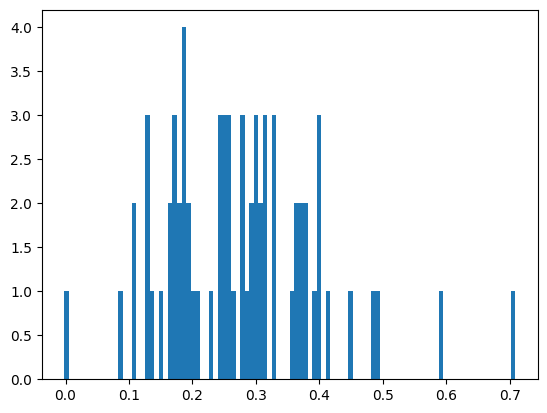

In [38]:
y_nor = test_df["y_nor"]
# plot histogram
import matplotlib.pyplot as plt

plt.hist(y_nor, bins=100)

In [39]:
diff_columns = test_df.columns.difference(train_df.columns)
diff_columns

Index(['Unnamed: 2'], dtype='object')

In [40]:
# drop diff_columns
test_df = test_df.drop(columns=diff_columns)

In [41]:
print("train_df", train_df.shape)
print("test_df", test_df.shape)

train_df (26835, 194)
test_df (69, 191)


In [42]:
# try to convert all columns to float
fail_to_convert_list = []
for col in train_df.columns:
    try:
        train_df[col] = train_df[col].astype(float)
    except:
        fail_to_convert_list.append(col)
print("fail_to_convert_list", fail_to_convert_list)

fail_to_convert_list ['prov_namt', 'open_dt', 'store_franchise', 'zone_code']


In [43]:
# drop open dt
train_df = train_df.drop(columns=["open_dt"])
test_df = test_df.drop(columns=["open_dt"])

In [44]:
# create one hot encoding for categorical columns
categorical_columns = ["prov_namt", "store_franchise", "zone_code"]
for col in categorical_columns:
    train_df[col] = train_df[col].astype(str)
    test_df[col] = test_df[col].astype(str)

# create one hot encoding for categorical columns
train_df = pd.get_dummies(train_df, columns=categorical_columns)
test_df = pd.get_dummies(test_df, columns=categorical_columns)

In [45]:
# check is any columns unique ==1
unique_columns = []
for col in train_df.columns:
    if len(train_df[col].unique()) == 1:
        unique_columns.append(col)
print("unique_columns", unique_columns)
# drop unique_columns
train_df = train_df.drop(columns=unique_columns)
# check is unique_columns in test_df then drop
for col in unique_columns:
    if col in test_df.columns:
        test_df = test_df.drop(columns=[col])

unique_columns ['POIs_utern_50m', 'POIs_utern_200m', 'POIs_utern_300m', 'POIs_utern_500m', 'POIs_utern_1000m', 'POIs_utern_2000m', 'strategic_location_เขตเศรษฐกิจพิเศษ', 'CRO_store_franchise_NDF', 'year']


In [46]:
print("train_df", train_df.shape)
print("test_df", test_df.shape)

train_df (26835, 197)
test_df (69, 185)


In [47]:
duplicated_columns = train_df.columns[train_df.T.duplicated(keep=False)]

if len(duplicated_columns) > 0:
    print("There are duplicate columns with the same values:")
    print(duplicated_columns)
else:
    print("No duplicate columns found.")

There are duplicate columns with the same values:
Index(['cro_open_year', 'open_date_year', 'CRO_store_franchise_PTTOR',
       'store_franchise_PTTOR'],
      dtype='object')


In [48]:
drop_columns = ["open_date_year", "store_franchise_PTTOR"]
train_df = train_df.drop(columns=drop_columns)
test_df = test_df.drop(columns=drop_columns)

In [49]:
# get min year from cro_open_year
min_year = train_df["cro_open_year"].min()
print("min_year", min_year)
train_df["cro_open_year"] = train_df["cro_open_year"] - 2000
test_df["cro_open_year"] = test_df["cro_open_year"] - 2000

min_year 2016.0


In [50]:
# save data to csv
train_df.to_csv("data/train.csv", index=False)
test_df.to_csv("data/test.csv", index=False)

In [51]:
# all_data
train_df["subset"] = "train"
test_df["subset"] = "test"
all_data = pd.concat([train_df, test_df], axis=0)
all_data.to_csv("data/all_data.csv", index=False)